**Prediction using Unsupervised ML**

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


In [ ]:
# Importing necessary libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [ ]:
# Reading the data from csv file and getting the first 5 rows
df = pd.read_csv("/content/Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Gathering data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# For k-means classification, finding the optimum number of clusters
from sklearn.cluster import KMeans

x = df.iloc[:, [1, 2, 3, 4]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

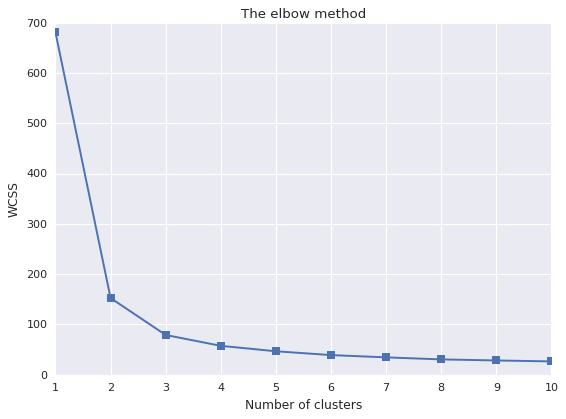

In [ ]:
# Plotting a line graph for the results to observe 'The elbow'
plt.plot(range(1, 11), wcss, marker='s')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.style.use("classic")
plt.show()

From the graph we can observe that there is an elbow formation at k = 3. Therefore the optimum value of k is 3 and hence we will cluster the data set into 3 clusters.

In [ ]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 5)
y_kmeans = kmeans.fit_predict(x)

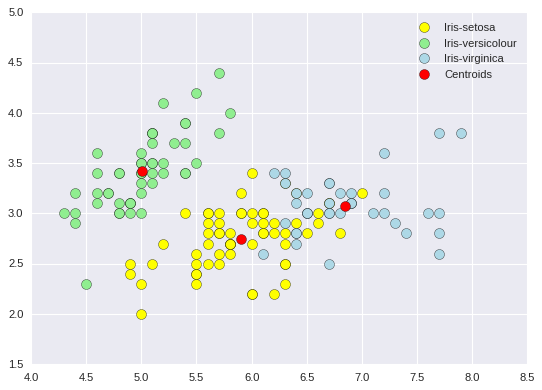

In [ ]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = "yellow", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = "lightgreen", label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = "lightblue", label = "Iris-virginica")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = "red", label = "Centroids")
plt.style.use("classic")
plt.legend()